In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import random
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [168]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - 副本 (2).xlsx")

In [169]:
test_y = data_test.iloc[:, 0] 

In [170]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [171]:
test_X = data_test.iloc[:, 1:] 
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create empty lists to store training and test set AUC scores for each n_estimators
train_auc_scores = []
test_auc_scores = []

# Loop through different numbers of trees
for i in range(10, 73, 1):
    # Create a random forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=321)
    
    # Train the random forest model
    rf_classifier.fit(train_X, train_y)
    
    # Predict using the training data and calculate training set AUC
    train_predictions = rf_classifier.predict(train_X)
    train_auc = roc_auc_score(train_y, train_predictions)
    train_auc_scores.append((i, train_auc))
    
    # Predict using the test data and calculate test set AUC
    test_predictions = rf_classifier.predict(test_X)
    test_auc = roc_auc_score(test_y, test_predictions)
    test_auc_scores.append((i, test_auc))
    
    # Print the training and test set AUC for each n_estimators
    print(f"n_estimators = {i}: Training set AUC = {train_auc}, Test set AUC = {test_auc}")



n_estimators = 10: Training set AUC = 0.9905091068685539, Test set AUC = 0.7691542288557214
n_estimators = 11: Training set AUC = 0.9939104674127716, Test set AUC = 0.7723383084577116
n_estimators = 12: Training set AUC = 0.9905091068685539, Test set AUC = 0.7707462686567165
n_estimators = 13: Training set AUC = 0.9905091068685539, Test set AUC = 0.7931343283582089
n_estimators = 14: Training set AUC = 0.9931972789115646, Test set AUC = 0.8064676616915423
n_estimators = 15: Training set AUC = 0.9905091068685539, Test set AUC = 0.8139303482587065
n_estimators = 16: Training set AUC = 0.9905091068685539, Test set AUC = 0.7990049751243782
n_estimators = 17: Training set AUC = 0.9939104674127716, Test set AUC = 0.8213930348258707
n_estimators = 18: Training set AUC = 0.9939104674127716, Test set AUC = 0.8123383084577114
n_estimators = 19: Training set AUC = 0.9939104674127716, Test set AUC = 0.8139303482587065
n_estimators = 20: Training set AUC = 0.9939104674127716, Test set AUC = 0.81980

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Set random forest parameters
rf_params = {
    'n_estimators': 30,
    'random_state': 321
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(**rf_params)

# Train the random forest model
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(n_estimators=30, random_state=321)

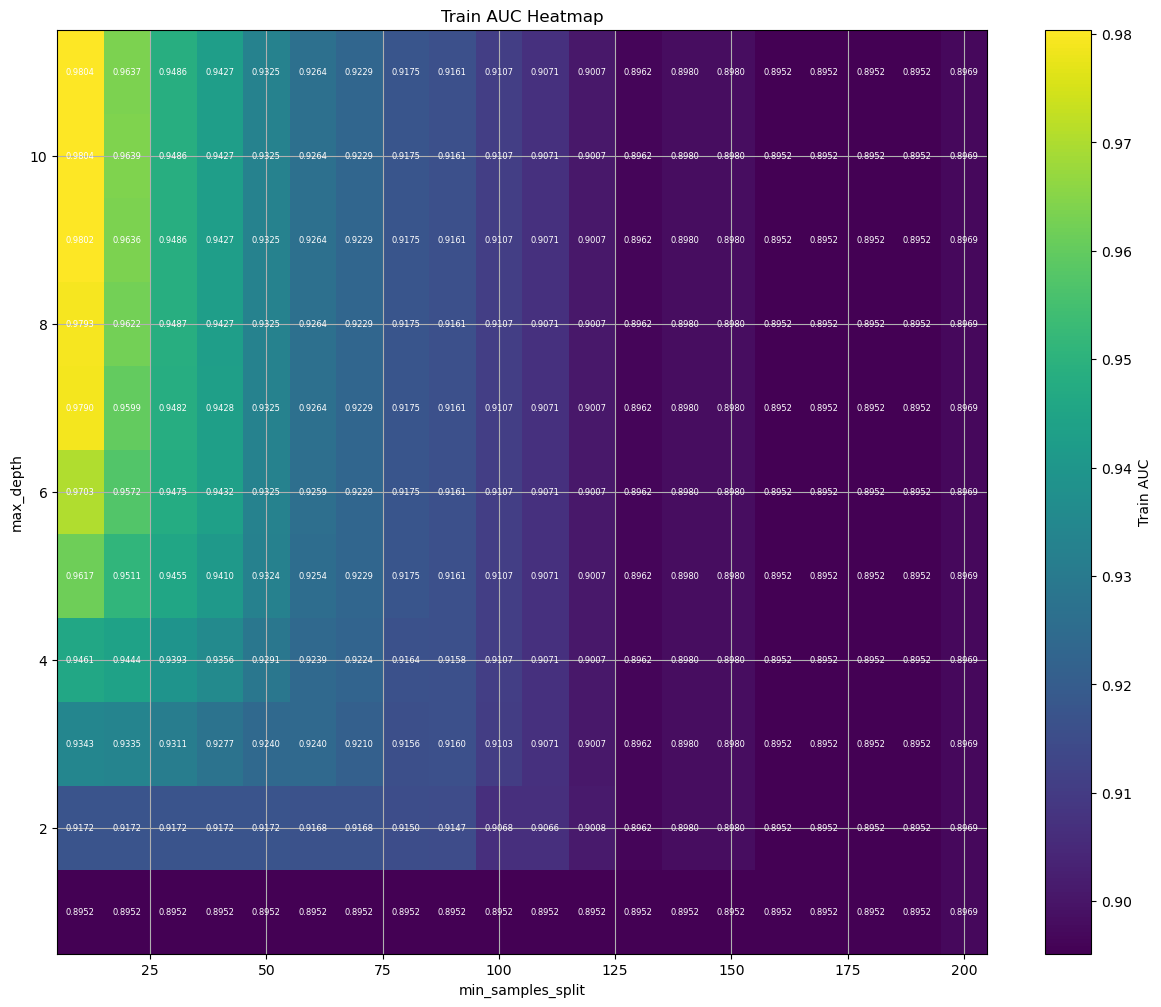

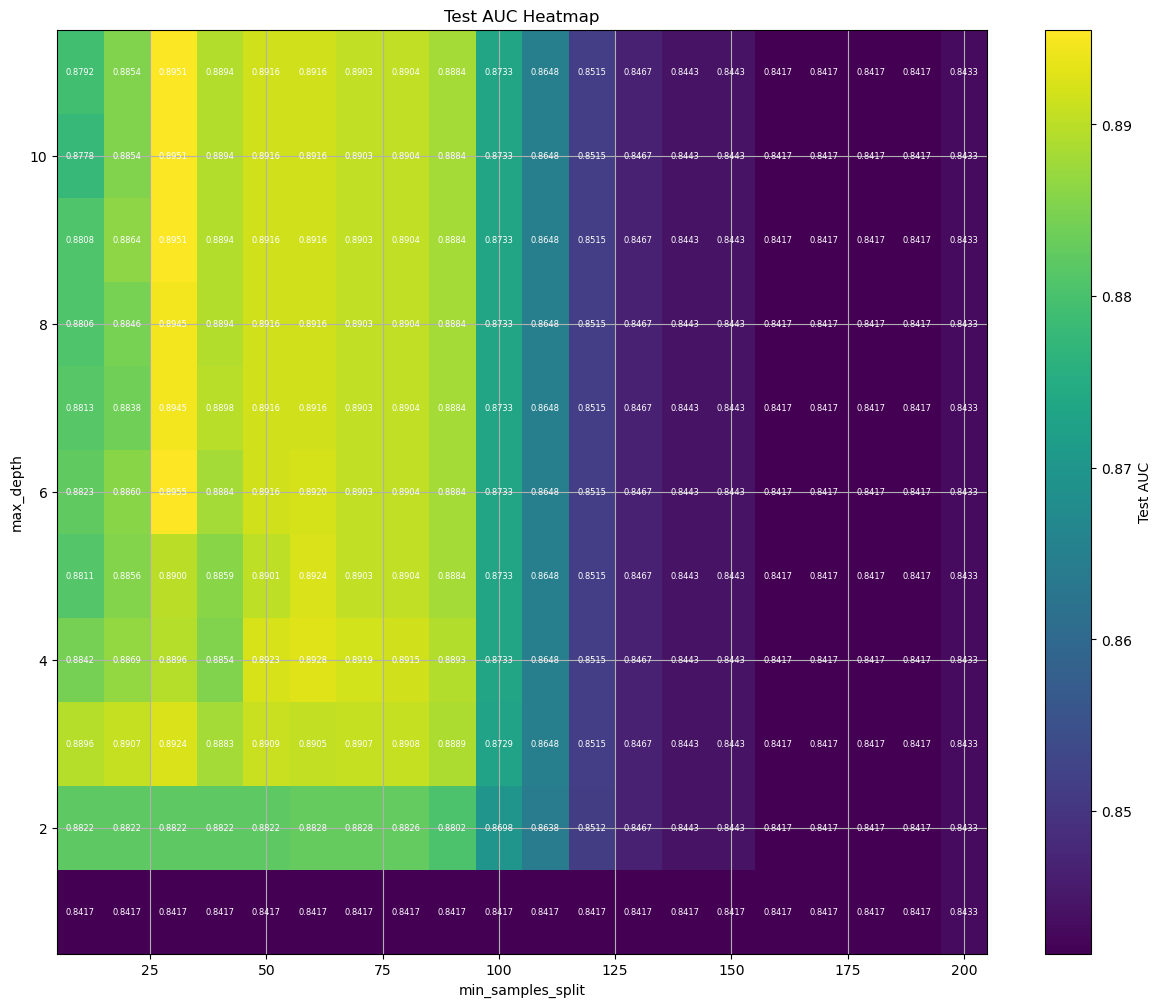

In [16]:
import matplotlib.pyplot as plt
import numpy as np

train_auc_values = []
test_auc_values = []

# Set max_depth_values as a list from 1 to 11 with step 1
max_depth_values = list(range(1, 12, 1))

# Set min_samples_split_values as a list from 10 to 200 with step 10
min_samples_split_values = list(range(10, 201, 10))

# Initialize lists to store AUC values
train_auc_values = []
test_auc_values = []

# Loop over max_depth and min_samples_split values
for max_depth_value in max_depth_values:
    for min_samples_split_value in min_samples_split_values:
        # Set random forest parameters
        rf_params = {
            'n_estimators': 30,
            'random_state': 321,
            'max_depth': max_depth_value,
            'min_samples_split': min_samples_split_value
        }

        # Create a random forest classifier
        rf_classifier = RandomForestClassifier(**rf_params)

        # Train the random forest model
        rf_classifier.fit(train_X, train_y)

        # Predict probabilities for training and test sets
        train_pred = rf_classifier.predict_proba(train_X)[:, 1]
        test_pred = rf_classifier.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred)
        test_auc = roc_auc_score(test_y, test_pred)

        # Store AUC scores
        train_auc_values.append(train_auc)
        test_auc_values.append(test_auc)

# Convert AUC values to arrays
train_auc_values = np.array(train_auc_values)
test_auc_values = np.array(test_auc_values)

import matplotlib.pyplot as plt
# For Train AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, train_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{train_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

# For Test AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, test_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Test AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{test_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

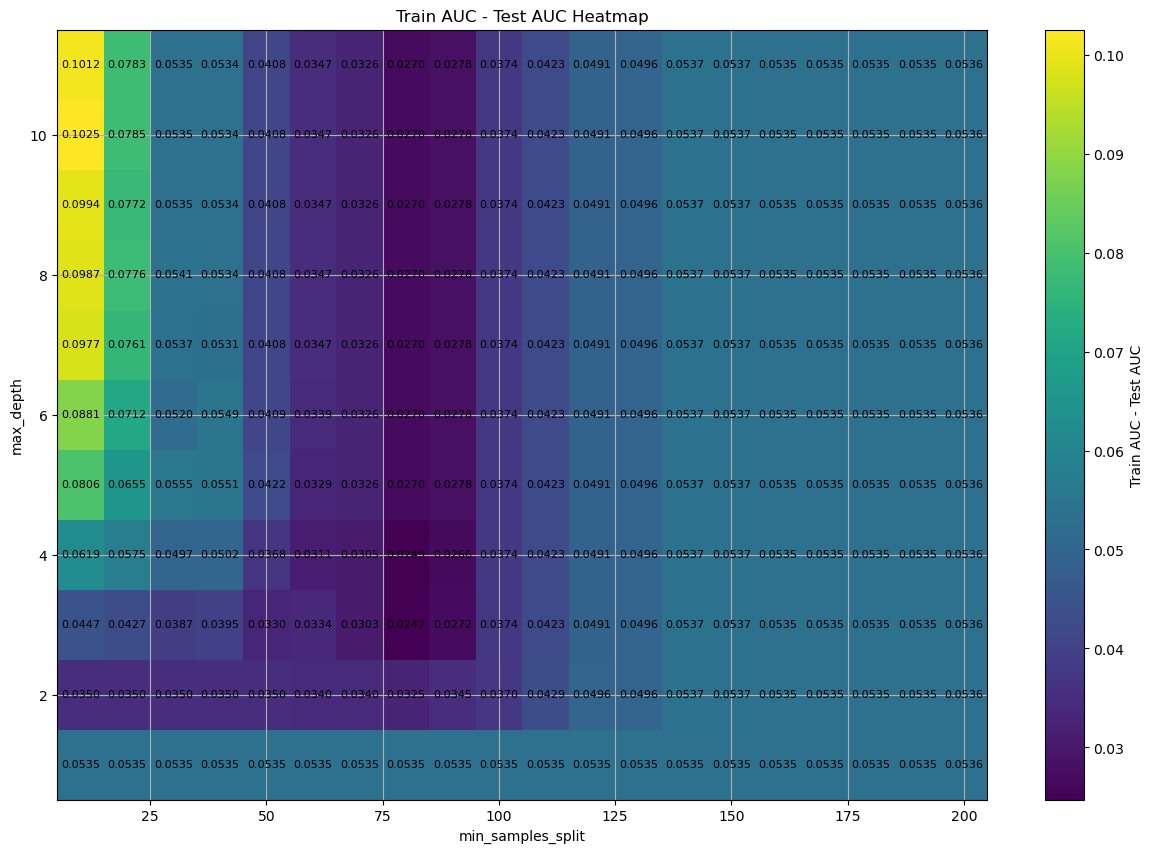

In [17]:
auc_diff_values = train_auc_values - test_auc_values  # Subtract train AUC from test AUC

plt.figure(figsize=(15, 10))
plt.pcolormesh(min_samples_split_values, max_depth_values, auc_diff_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC - Test AUC')  # Corrected label
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC - Test AUC Heatmap')  # Corrected title

# Displaying numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{auc_diff_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='black', fontsize=8)

plt.grid(True)
plt.show()

In [18]:
#You can record what you want to save here

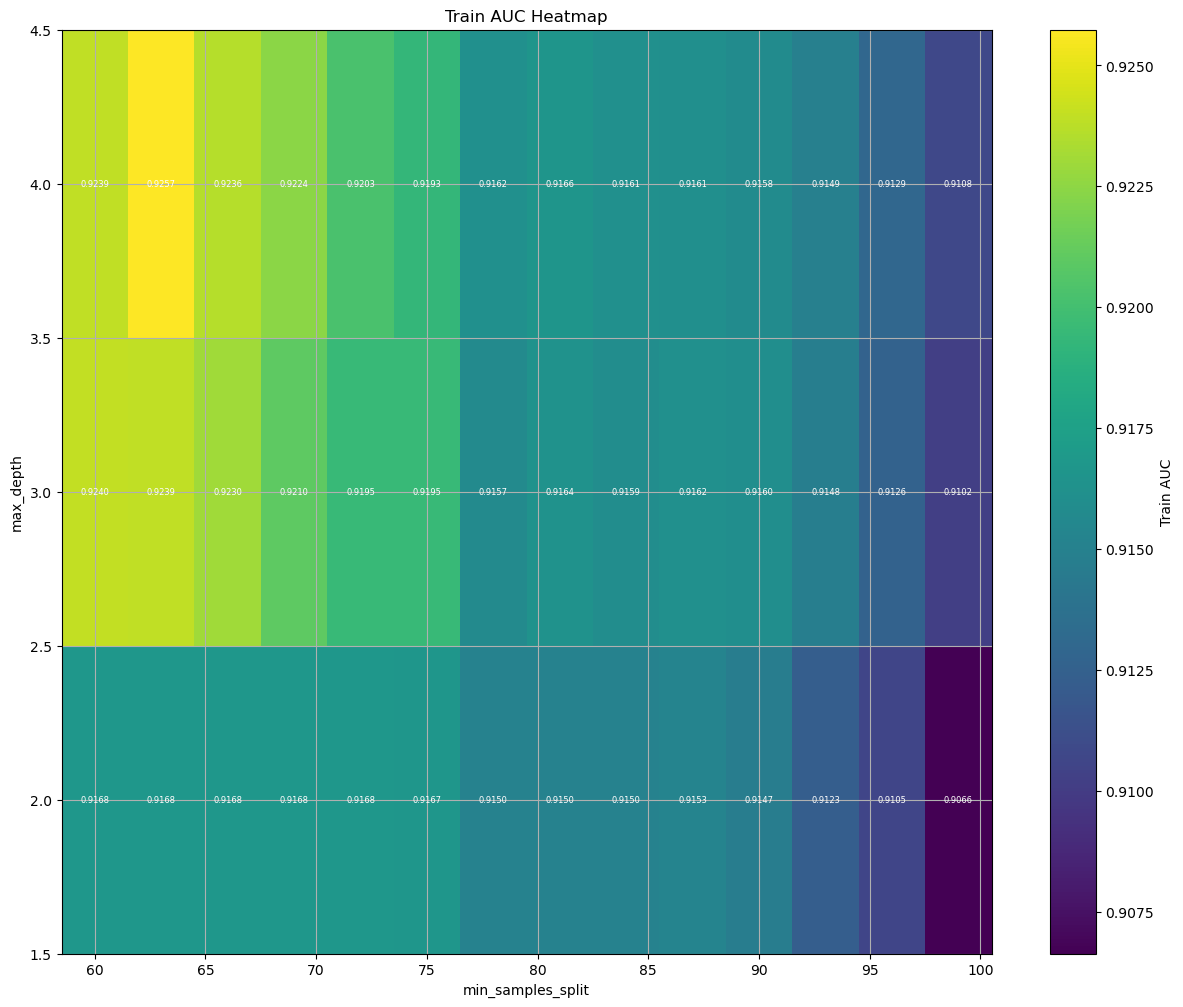

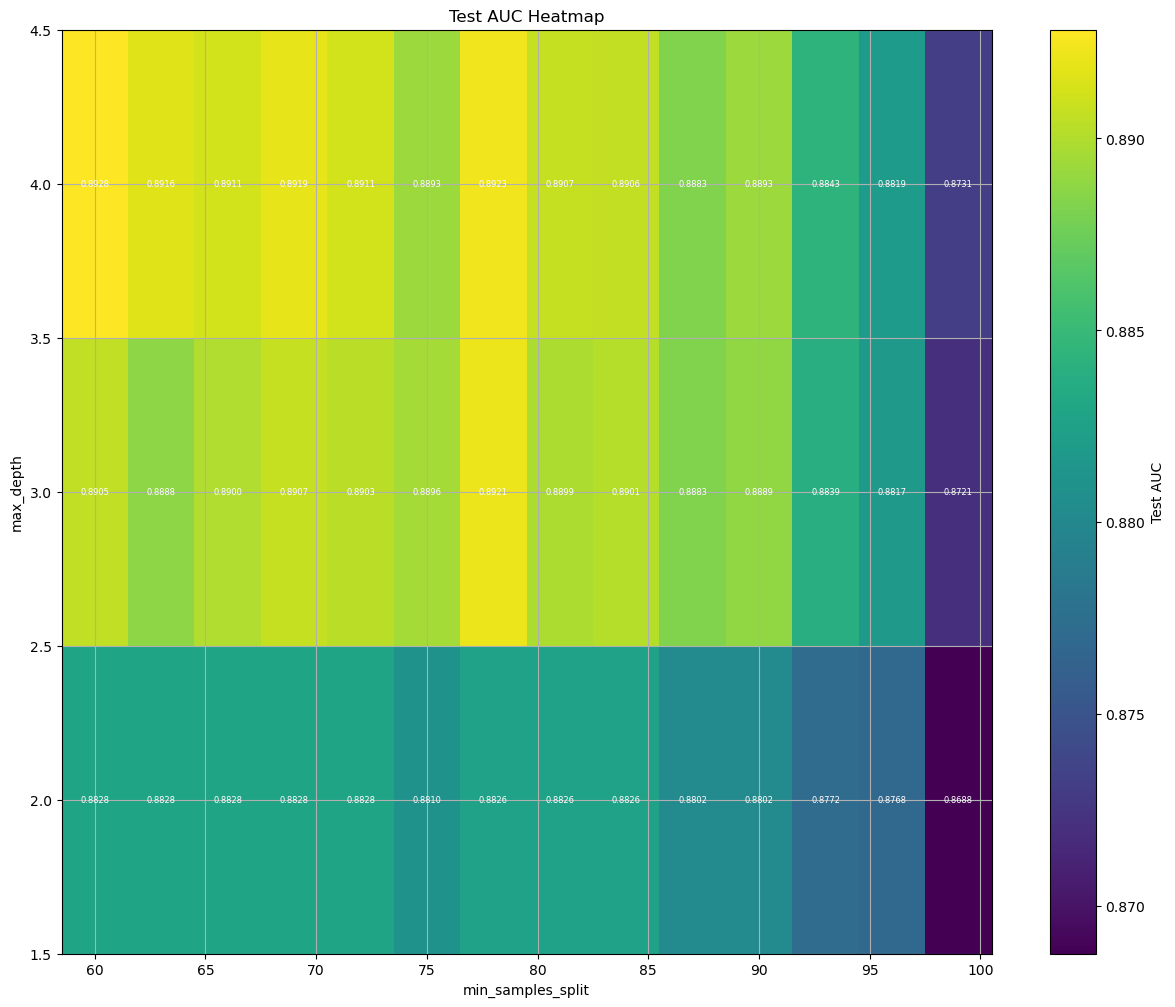

In [19]:
import matplotlib.pyplot as plt
import numpy as np

train_auc_values = []
test_auc_values = []

# Set max_depth_values as a list from 2 to 4 with step 1
max_depth_values = list(range(2, 5, 1))

# Set min_samples_split_values as a list from 60 to 99 with step 3
min_samples_split_values = list(range(60, 100, 3))

# Initialize lists to store AUC values
train_auc_values = []
test_auc_values = []

# Loop over max_depth and min_samples_split values
for max_depth_value in max_depth_values:
    for min_samples_split_value in min_samples_split_values:
        # Set random forest parameters
        rf_params = {
            'n_estimators': 30,
            'random_state': 321,
            'max_depth': max_depth_value,
            'min_samples_split': min_samples_split_value
        }

        # Create a random forest classifier
        rf_classifier = RandomForestClassifier(**rf_params)

        # Train the random forest model
        rf_classifier.fit(train_X, train_y)

        # Predict probabilities for training and test sets
        train_pred = rf_classifier.predict_proba(train_X)[:, 1]
        test_pred = rf_classifier.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred)
        test_auc = roc_auc_score(test_y, test_pred)

        # Store AUC scores
        train_auc_values.append(train_auc)
        test_auc_values.append(test_auc)

# Convert AUC values to arrays
train_auc_values = np.array(train_auc_values)
test_auc_values = np.array(test_auc_values)

import matplotlib.pyplot as plt

# For Train AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, train_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{train_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

# For Test AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, test_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Test AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{test_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()



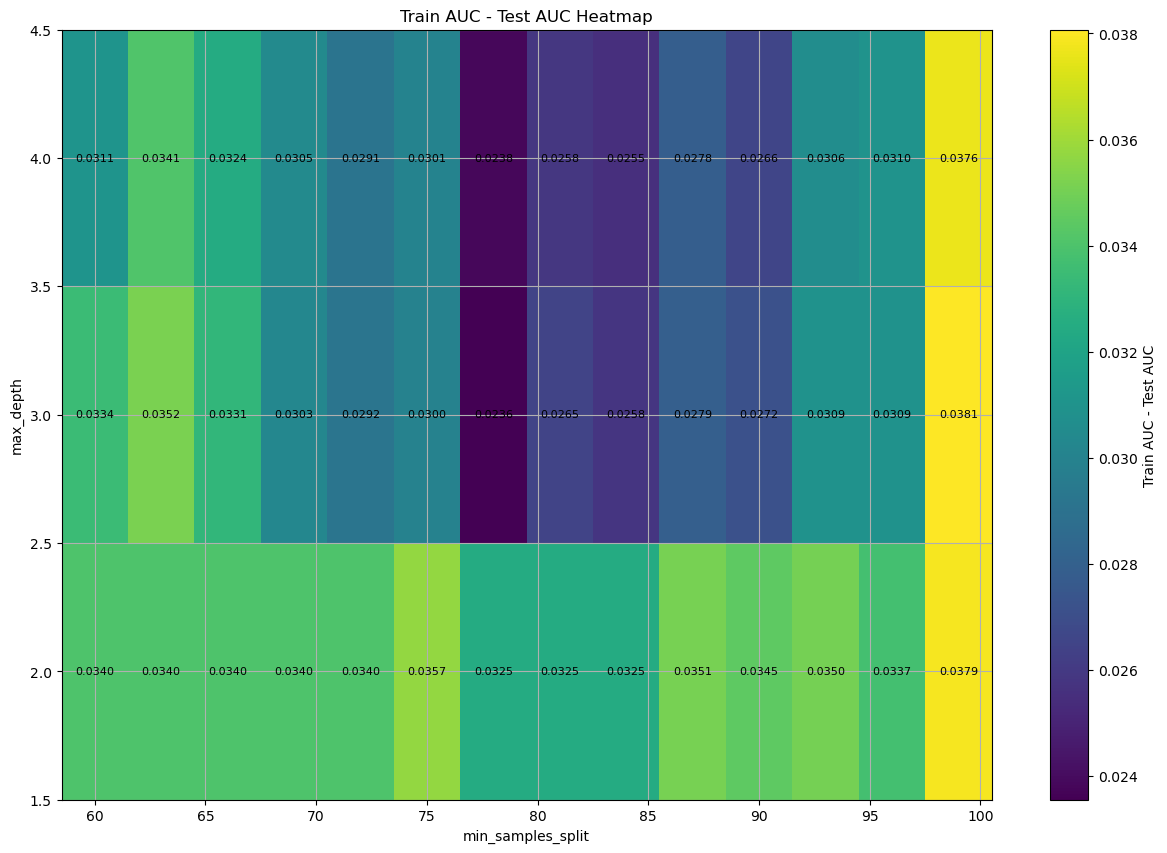

In [20]:
auc_diff_values = train_auc_values - test_auc_values  # Subtract train AUC from test AUC

plt.figure(figsize=(15, 10))
plt.pcolormesh(min_samples_split_values, max_depth_values, auc_diff_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC - Test AUC')  # Corrected label
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC - Test AUC Heatmap')  # Corrected title

# Displaying numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{auc_diff_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='black', fontsize=8)

plt.grid(True)
plt.show()


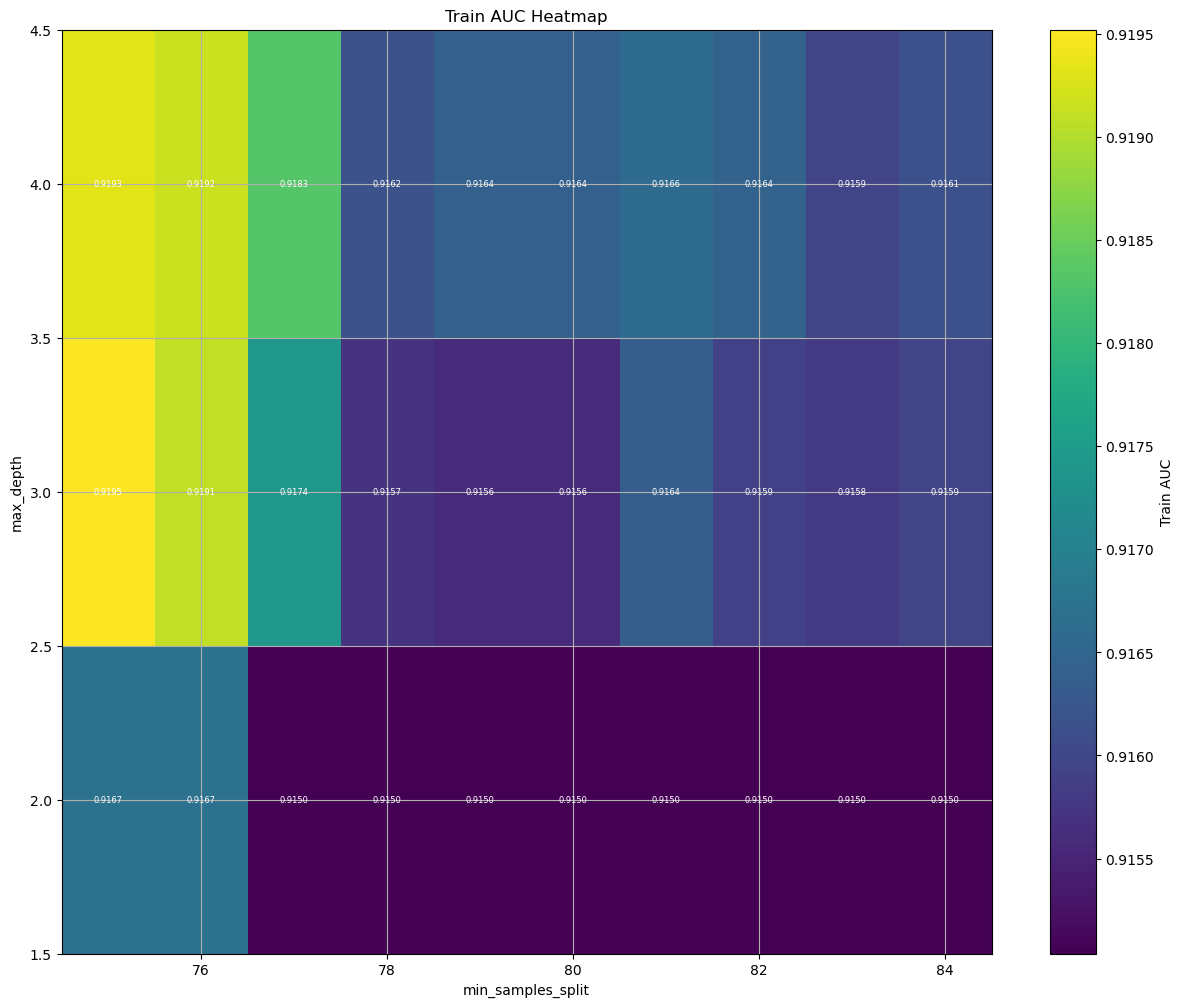

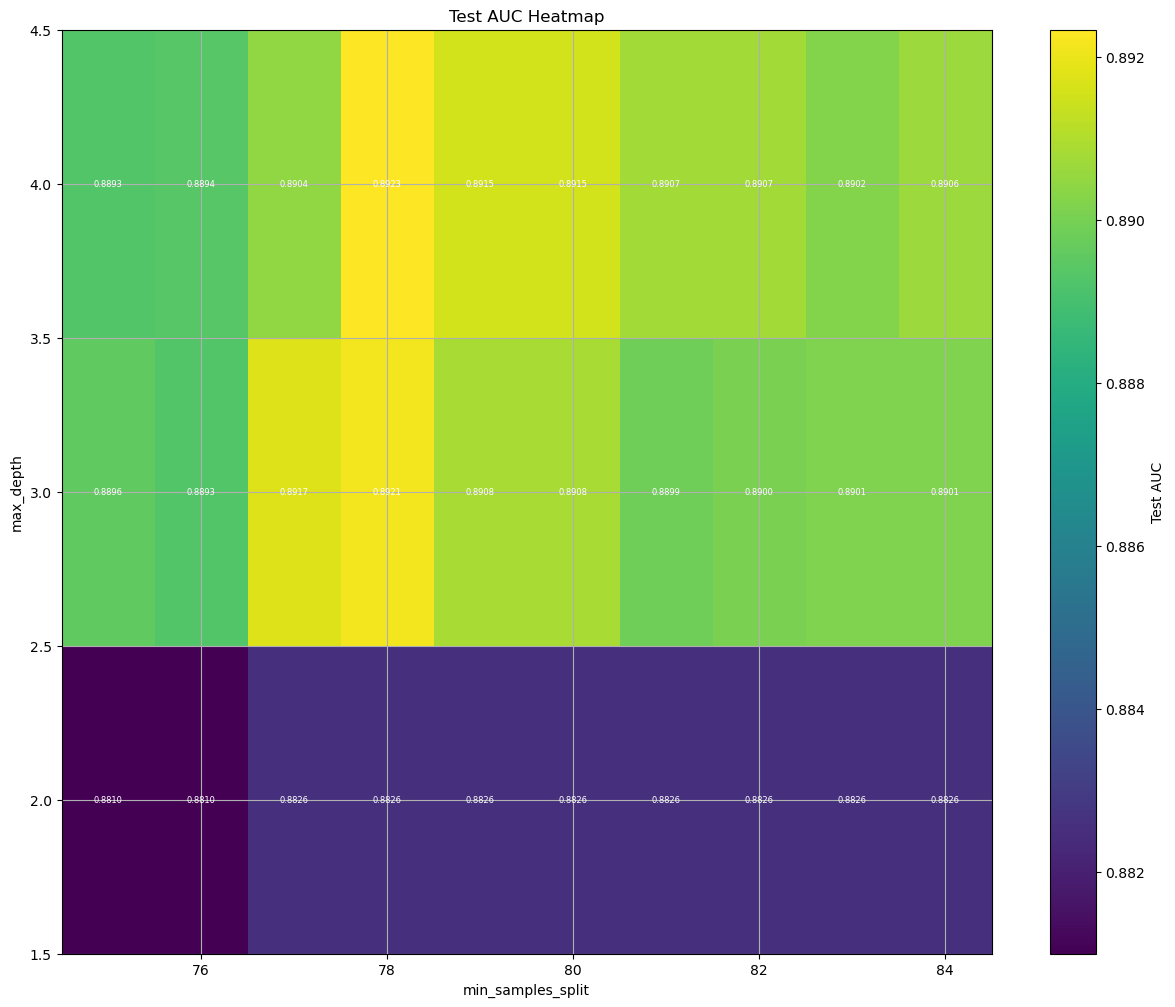

In [21]:
import matplotlib.pyplot as plt
import numpy as np

train_auc_values = []
test_auc_values = []

# Set max_depth_values as a list from 2 to 4 with step 1
max_depth_values = list(range(2, 5, 1))

# Set min_samples_split_values as a list from 75 to 84 with step 1
min_samples_split_values = list(range(75, 85, 1))

# Loop over max_depth and min_samples_split values
for max_depth_value in max_depth_values:
    for min_samples_split_value in min_samples_split_values:
        # Set random forest parameters
        rf_params = {
            'n_estimators': 30,
            'random_state': 321,
            'max_depth': max_depth_value,
            'min_samples_split': min_samples_split_value
        }

        # Create a random forest classifier
        rf_classifier = RandomForestClassifier(**rf_params)

        # Train the random forest model
        rf_classifier.fit(train_X, train_y)

        # Predict probabilities for training and test sets
        train_pred = rf_classifier.predict_proba(train_X)[:, 1]
        test_pred = rf_classifier.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred)
        test_auc = roc_auc_score(test_y, test_pred)

        # Store AUC scores
        train_auc_values.append(train_auc)
        test_auc_values.append(test_auc)

# Convert AUC values to arrays
train_auc_values = np.array(train_auc_values)
test_auc_values = np.array(test_auc_values)

import matplotlib.pyplot as plt

# For Train AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, train_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{train_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

# For Test AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, test_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Test AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{test_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

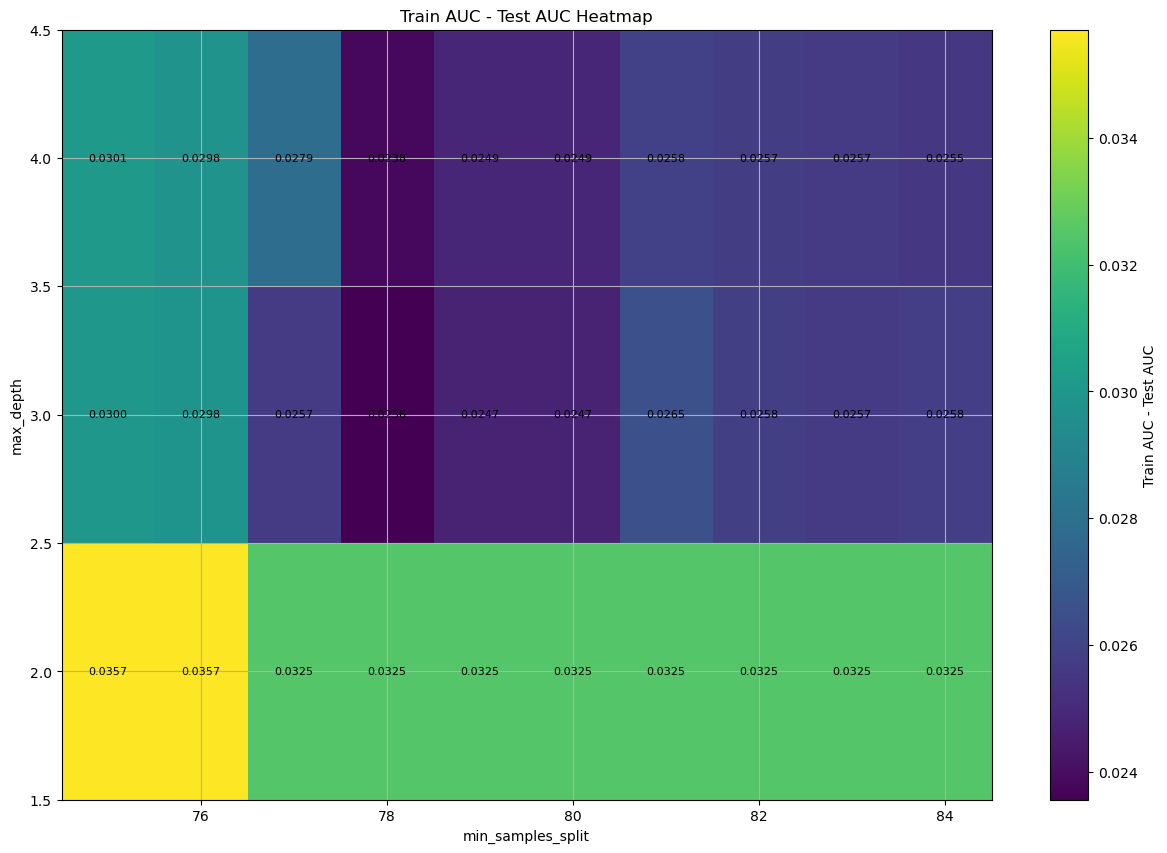

In [22]:
auc_diff_values = train_auc_values - test_auc_values  # Subtract train AUC from test AUC

plt.figure(figsize=(15, 10))
plt.pcolormesh(min_samples_split_values, max_depth_values, auc_diff_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC - Test AUC')  # Corrected label
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC - Test AUC Heatmap')  # Corrected title

# Displaying numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{auc_diff_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='black', fontsize=8)

plt.grid(True)
plt.show()

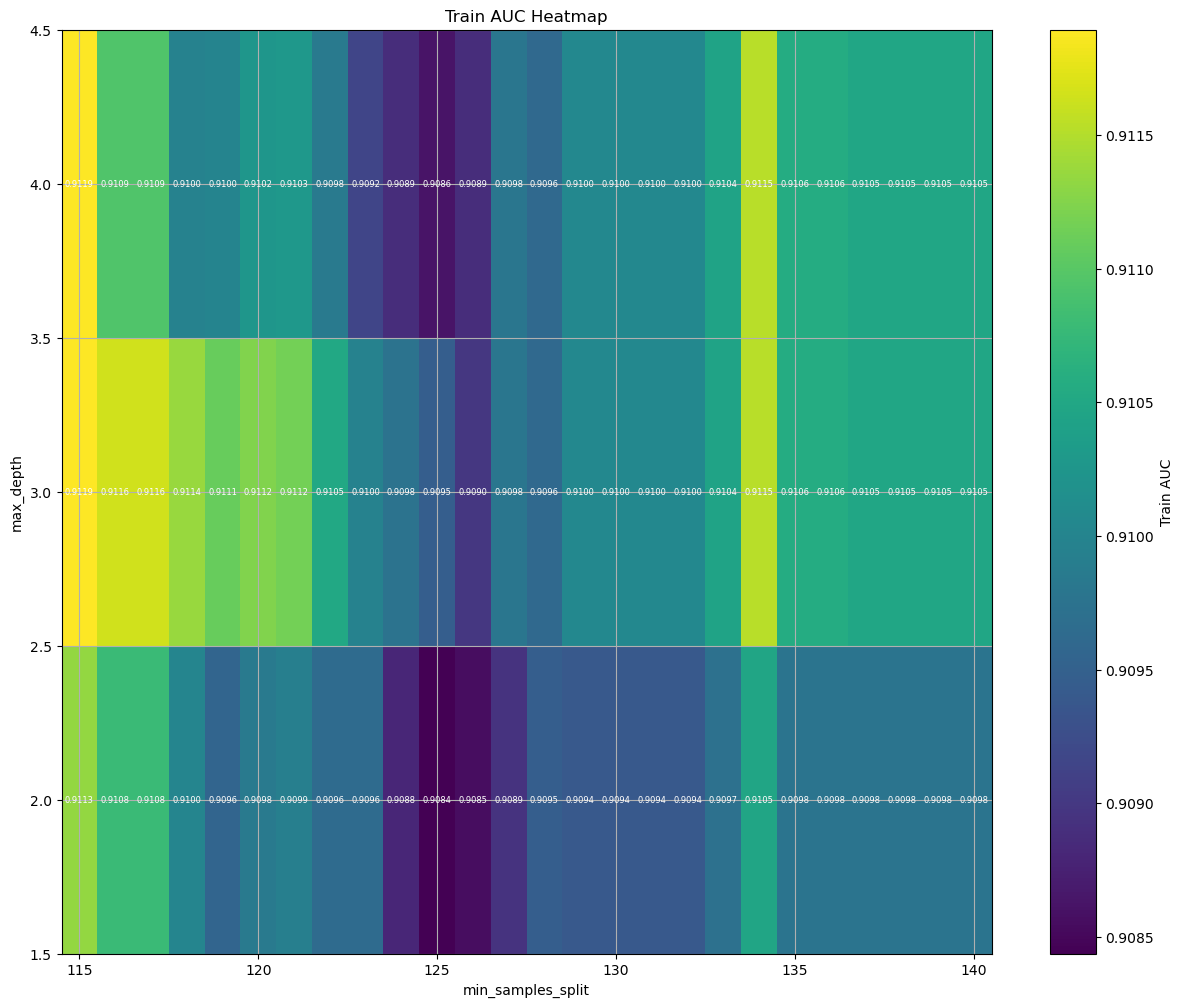

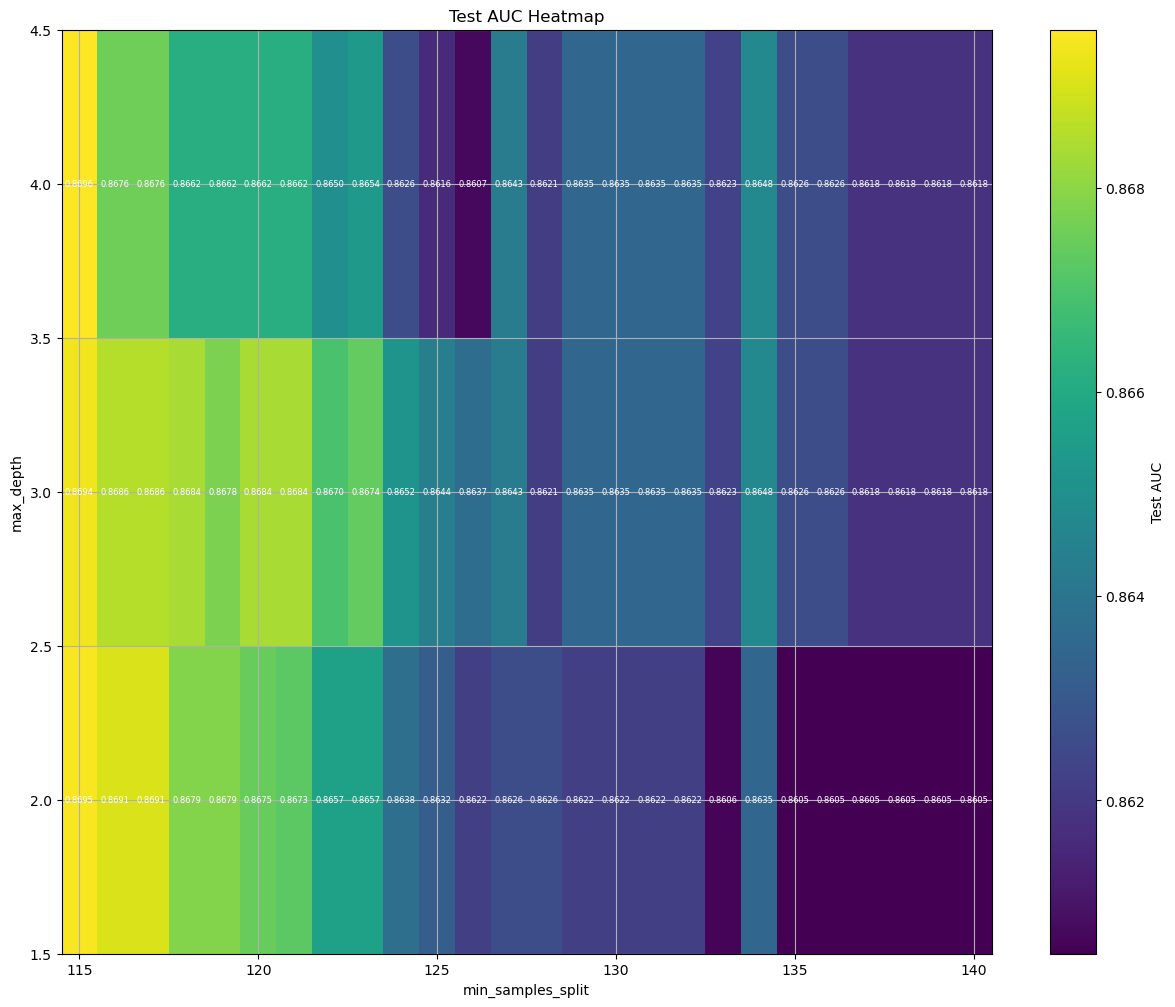

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store AUC values
train_auc_values = []
test_auc_values = []

# Set max_depth_values as a list from 2 to 4 with step 1
max_depth_values = list(range(2, 5, 1))

# Set min_samples_split_values as a list from 115 to 140 with step 1
min_samples_split_values = list(range(115, 141, 1))


# Loop over max_depth and min_samples_split values
for max_depth_value in max_depth_values:
    for min_samples_split_value in min_samples_split_values:
        # Set random forest parameters
        rf_params = {
            'n_estimators': 59,
            'random_state': 321,
            'max_depth': max_depth_value,
            'min_samples_split': min_samples_split_value
        }

        # Create a random forest classifier
        rf_classifier = RandomForestClassifier(**rf_params)

        # Train the random forest model
        rf_classifier.fit(train_X, train_y)

        # Predict probabilities for training and test sets
        train_pred = rf_classifier.predict_proba(train_X)[:, 1]
        test_pred = rf_classifier.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred)
        test_auc = roc_auc_score(test_y, test_pred)

        # Store AUC scores
        train_auc_values.append(train_auc)
        test_auc_values.append(test_auc)

# Convert AUC values to arrays
train_auc_values = np.array(train_auc_values)
test_auc_values = np.array(test_auc_values)

import matplotlib.pyplot as plt

# For Train AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, train_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{train_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

# For Test AUC
plt.figure(figsize=(15, 12))  # Enlarged figure
plt.pcolormesh(min_samples_split_values, max_depth_values, test_auc_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Test AUC Heatmap')

# Display numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{test_auc_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='white', fontsize=6)  # Smaller font size

plt.grid(True)
plt.show()

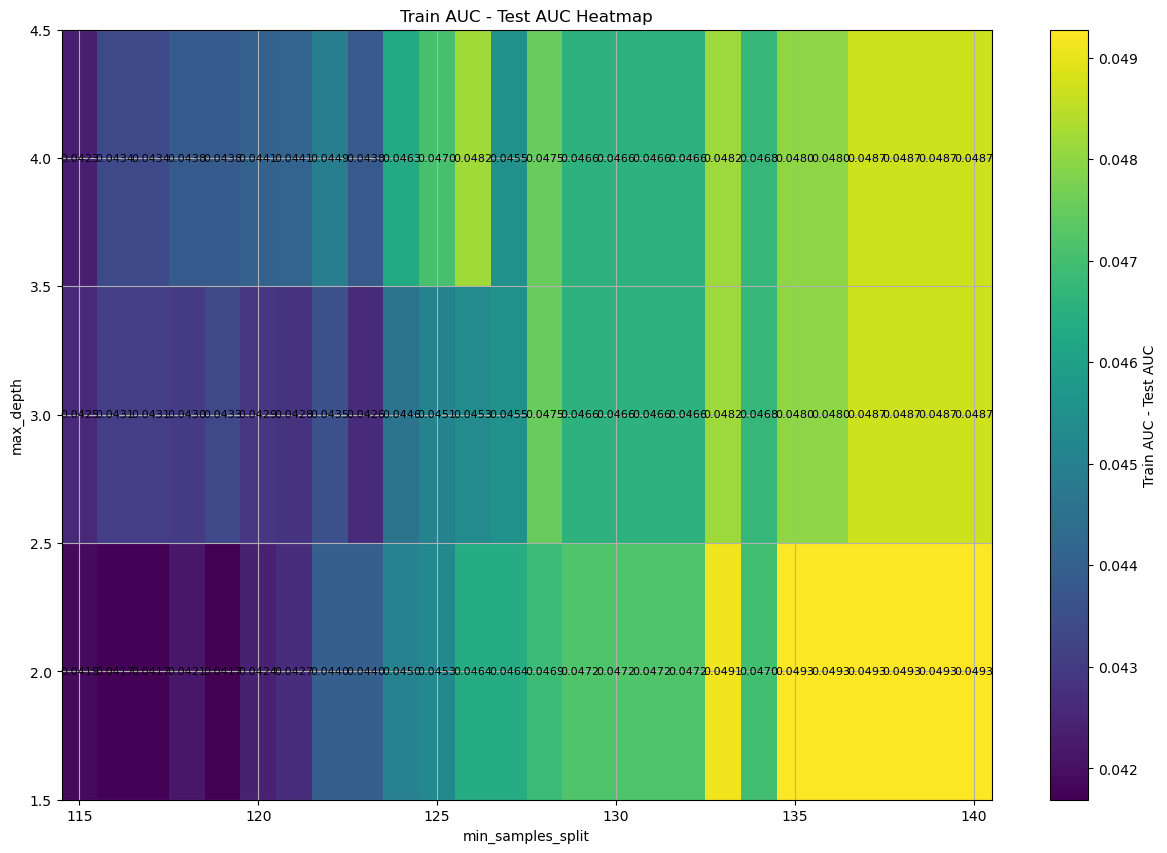

In [24]:
auc_diff_values = train_auc_values - test_auc_values  # Subtract train AUC from test AUC

plt.figure(figsize=(15, 10))
plt.pcolormesh(min_samples_split_values, max_depth_values, auc_diff_values.reshape(len(max_depth_values), len(min_samples_split_values)), cmap='viridis')
plt.colorbar(label='Train AUC - Test AUC')  # Corrected label
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Train AUC - Test AUC Heatmap')  # Corrected title

# Displaying numerical values
for i in range(len(max_depth_values)):
    for j in range(len(min_samples_split_values)):
        plt.text(min_samples_split_values[j], max_depth_values[i], f'{auc_diff_values[i * len(min_samples_split_values) + j]:.4f}', ha='center', va='center', color='black', fontsize=8)

plt.grid(True)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Assume you have train_X, test_X, train_y, test_y data

# Define parameter combinations
min_samples_split_values = list(range(70, 90, 1))
min_samples_leaf_values = list(range(14, 16, 1))

# Dictionary to store results
results = {}

# Define Random Forest parameters
rf_params = {
    'n_estimators': 30,
    'random_state': 321,
    'max_depth': 4,
}

for min_samples_split in min_samples_split_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Update parameters
        rf_params['min_samples_split'] = min_samples_split
        rf_params['min_samples_leaf'] = min_samples_leaf
        
        # Create Random Forest classifier
        rf_model = RandomForestClassifier(**rf_params)
        
        # Train the model
        rf_model.fit(train_X, train_y)
        
        # Predict on training and test sets
        y_train_pred = rf_model.predict_proba(train_X)[:, 1]
        y_test_pred = rf_model.predict_proba(test_X)[:, 1]
        
        # Calculate AUC
        train_auc = roc_auc_score(train_y, y_train_pred)
        test_auc = roc_auc_score(test_y, y_test_pred)
        
        # Store results
        results[(min_samples_split, min_samples_leaf)] = {'train_auc': train_auc, 'test_auc': test_auc}

# Print results
for params, scores in results.items():
    print(f"Min Samples Split: {params[0]}, Min Samples Leaf: {params[1]}")
    print(f"Train AUC: {scores['train_auc']}, Test AUC: {scores['test_auc']}")


Min Samples Split: 70, Min Samples Leaf: 14
Train AUC: 0.9191353960939214, Test AUC: 0.8877611940298509
Min Samples Split: 70, Min Samples Leaf: 15
Train AUC: 0.9188976665935191, Test AUC: 0.8881592039800995
Min Samples Split: 71, Min Samples Leaf: 14
Train AUC: 0.9179101748226172, Test AUC: 0.8877611940298507
Min Samples Split: 71, Min Samples Leaf: 15
Train AUC: 0.9177090190915076, Test AUC: 0.8881592039800995
Min Samples Split: 72, Min Samples Leaf: 14
Train AUC: 0.917233560090703, Test AUC: 0.8872636815920397
Min Samples Split: 72, Min Samples Leaf: 15
Train AUC: 0.916739814205252, Test AUC: 0.8874626865671642
Min Samples Split: 73, Min Samples Leaf: 14
Train AUC: 0.9170872650135323, Test AUC: 0.8874626865671642
Min Samples Split: 73, Min Samples Leaf: 15
Train AUC: 0.9165569453587886, Test AUC: 0.8872636815920398
Min Samples Split: 74, Min Samples Leaf: 14
Train AUC: 0.9170506912442397, Test AUC: 0.8874626865671642
Min Samples Split: 74, Min Samples Leaf: 15
Train AUC: 0.916483797

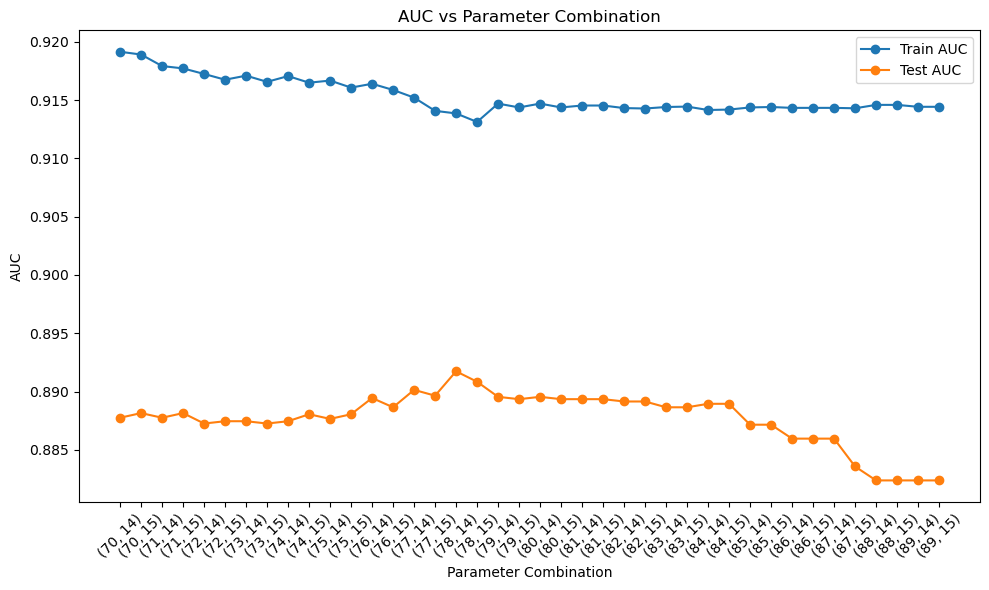

In [26]:
import matplotlib.pyplot as plt


train_auc_values = []
test_auc_values = []

for params, scores in results.items():
    train_auc_values.append(scores['train_auc'])
    test_auc_values.append(scores['test_auc'])

# plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(results)), train_auc_values, label='Train AUC', marker='o')
plt.plot(range(len(results)), test_auc_values, label='Test AUC', marker='o')
plt.xticks(range(len(results)), results.keys(), rotation=45)
plt.xlabel('Parameter Combination')
plt.ylabel('AUC')
plt.title('AUC vs Parameter Combination')
plt.legend()
plt.tight_layout()
plt.show()


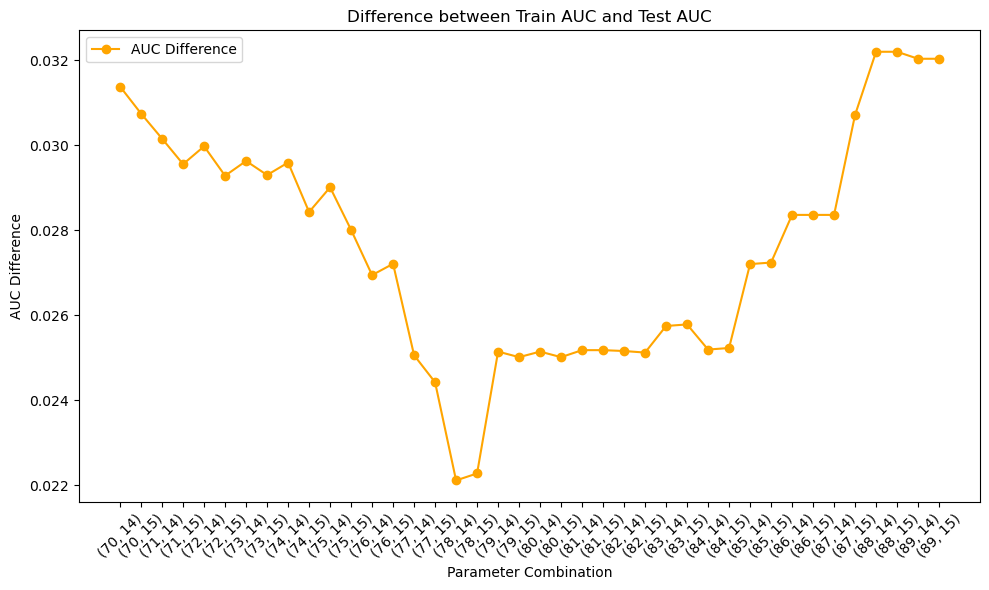

Parameters: (70, 14), AUC Difference: 0.03137420206407049
Parameters: (70, 15), AUC Difference: 0.030738462613419615
Parameters: (71, 14), AUC Difference: 0.03014898079276651
Parameters: (71, 15), AUC Difference: 0.029549815111408084
Parameters: (72, 14), AUC Difference: 0.029969878498663283
Parameters: (72, 15), AUC Difference: 0.029277127638087763
Parameters: (73, 14), AUC Difference: 0.02962457844636812
Parameters: (73, 15), AUC Difference: 0.02929326376674879
Parameters: (74, 14), AUC Difference: 0.029588004677075452
Parameters: (74, 15), AUC Difference: 0.02842409632766607
Parameters: (75, 14), AUC Difference: 0.029004975124378274
Parameters: (75, 15), AUC Difference: 0.028003497980800374
Parameters: (76, 14), AUC Difference: 0.026939627078563788
Parameters: (76, 15), AUC Difference: 0.027205327324317685
Parameters: (77, 14), AUC Difference: 0.02505446216361673
Parameters: (77, 15), AUC Difference: 0.024418187753355247
Parameters: (78, 14), AUC Difference: 0.022109192898793317
Par

In [27]:
import matplotlib.pyplot as plt


train_auc_values = []
test_auc_values = []

# Store the difference between training set AUC and test set AUC.
auc_diff_values = []

for params, scores in results.items():
    train_auc = scores['train_auc']
    test_auc = scores['test_auc']
    
    train_auc_values.append(train_auc)
    test_auc_values.append(test_auc)
    
    # Calculate AUC difference.
    auc_diff = train_auc - test_auc
    auc_diff_values.append(auc_diff)

# plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(results)), auc_diff_values, label='AUC Difference', marker='o', color='orange')
plt.xticks(range(len(results)), results.keys(), rotation=45)
plt.xlabel('Parameter Combination')
plt.ylabel('AUC Difference')
plt.title('Difference between Train AUC and Test AUC')
plt.legend()
plt.tight_layout()
plt.show()

# print the AUC difference.
for params, auc_diff in zip(results.keys(), auc_diff_values):
    print(f"Parameters: {params}, AUC Difference: {auc_diff}")


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Select your desired hyperparameters
rf_params = {
    'n_estimators': 30,
    'random_state': 321, 
    'max_depth': 4,
    'min_samples_leaf':15,
    'min_samples_split':75,
}

best_RF = RandomForestClassifier(**rf_params)

best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.8169014084507042


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define parameters except 'max_features'
rf_params = {
    'n_estimators': 30,
    'random_state': 321,
    'max_depth': 4,
    'min_samples_leaf':15,
    'min_samples_split':75,

}
# Data structures to store AUC scores for different max_features
max_features_train_auc = {}
max_features_test_auc = {}

# Iterate over different values of max_features
for max_feat in range(2, 10):
    # Add max_features to rf_params
    rf_params['max_features'] = max_feat

    # Create Random Forest Classifier with current parameters
    best_RF = RandomForestClassifier(**rf_params)

    # Train Random Forest model
    best_RF.fit(train_X, train_y)

    # Predict probabilities on train and test sets
    train_probs = best_RF.predict_proba(train_X)[:, 1]
    test_probs = best_RF.predict_proba(test_X)[:, 1]

    # Calculate AUC
    train_auc = roc_auc_score(train_y, train_probs)
    test_auc = roc_auc_score(test_y, test_probs)

    # Store AUC in dictionaries
    max_features_train_auc[max_feat] = train_auc
    max_features_test_auc[max_feat] = test_auc

    # Print results
    print(f"Max Features: {max_feat}")
    print(f"  Train AUC: {train_auc}")
    print(f"  Test AUC: {test_auc}")

# Print AUC scores for all max_features
print("Train AUC for different max_features:", max_features_train_auc)
print("Test AUC for different max_features:", max_features_test_auc)


Max Features: 2
  Train AUC: 0.9160449125886914
  Test AUC: 0.8854726368159204
Max Features: 3
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 4
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 5
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 6
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 7
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 8
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Max Features: 9
  Train AUC: 0.9176724453222148
  Test AUC: 0.8875621890547264
Train AUC for different max_features: {2: 0.9160449125886914, 3: 0.9176724453222148, 4: 0.9176724453222148, 5: 0.9176724453222148, 6: 0.9176724453222148, 7: 0.9176724453222148, 8: 0.9176724453222148, 9: 0.9176724453222148}
Test AUC for different max_features: {2: 0.8854726368159204, 3: 0.8875621890547264, 4: 0.8875621890547264, 5: 0.8875621890547264, 6: 0.8875621890

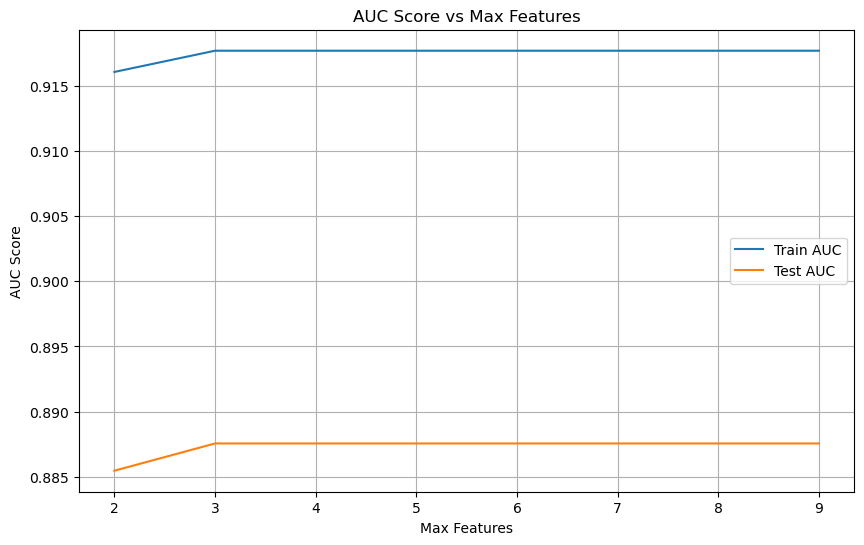

Difference between Train and Test AUC for each max_features:
Max Features=2: 0.030572275772770996
Max Features=3: 0.030110256267488422
Max Features=4: 0.030110256267488422
Max Features=5: 0.030110256267488422
Max Features=6: 0.030110256267488422
Max Features=7: 0.030110256267488422
Max Features=8: 0.030110256267488422
Max Features=9: 0.030110256267488422


In [30]:
import matplotlib.pyplot as plt

# Plotting the AUC scores for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), list(max_features_train_auc.values()), label='Train AUC')
plt.plot(range(2, 10), list(max_features_test_auc.values()), label='Test AUC')
plt.xlabel('Max Features')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Max Features')
plt.xticks(range(2, 10))
plt.legend()
plt.grid(True)
plt.show()

# Print the difference between train and test AUC for each max_features
print("Difference between Train and Test AUC for each max_features:")
for max_feat in range(2, 10):
    auc_diff = max_features_train_auc[max_feat] - max_features_test_auc[max_feat]
    print(f"Max Features={max_feat}: {auc_diff}")


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


train_auc_scores = []
test_auc_scores = []

rf_params = {
    'n_estimators': 30,
    'random_state': 321,
    'max_depth': 4,
    'min_samples_leaf':15,
    'min_samples_split':75,
    'max_features':3,
}

for i in range(20, 80, 1):
    rf_params['n_estimators'] = i

    rf_model = RandomForestClassifier(**rf_params)

    rf_model.fit(train_X, train_y)

    train_auc = roc_auc_score(train_y, rf_model.predict_proba(train_X)[:, 1])
    test_auc = roc_auc_score(test_y, rf_model.predict_proba(test_X)[:, 1])
    
    # Save the AUC score
    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)
    
    print(f"n_estimators={i}, Train AUC: {train_auc}, Test AUC: {test_auc}")



n_estimators=20, Train AUC: 0.916520371589496, Test AUC: 0.8880597014925373
n_estimators=21, Train AUC: 0.9174347158218126, Test AUC: 0.8858706467661691
n_estimators=22, Train AUC: 0.9171238387828249, Test AUC: 0.886268656716418
n_estimators=23, Train AUC: 0.9171238387828249, Test AUC: 0.886268656716418
n_estimators=24, Train AUC: 0.917068978128886, Test AUC: 0.8862686567164179
n_estimators=25, Train AUC: 0.917068978128886, Test AUC: 0.8862686567164179
n_estimators=26, Train AUC: 0.9168312486284835, Test AUC: 0.886268656716418
n_estimators=27, Train AUC: 0.9173249945139346, Test AUC: 0.8860696517412935
n_estimators=28, Train AUC: 0.9169958305903005, Test AUC: 0.886865671641791
n_estimators=29, Train AUC: 0.9169592568210079, Test AUC: 0.8870646766169153
n_estimators=30, Train AUC: 0.9176724453222148, Test AUC: 0.8875621890547264
n_estimators=31, Train AUC: 0.9177821666300928, Test AUC: 0.8875621890547264
n_estimators=32, Train AUC: 0.9179833223612025, Test AUC: 0.8881592039800995
n_esti

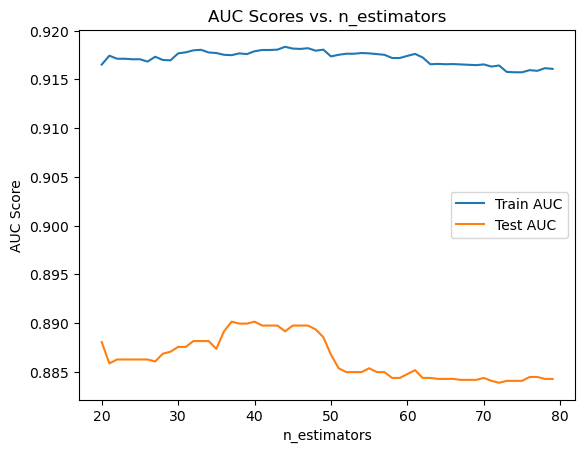

In [32]:
import matplotlib.pyplot as plt

# Set the range for n_estimators
n_estimators_range = range(20, 80, 1)

# Plot the training and test AUC curves
plt.plot(n_estimators_range, train_auc_scores, label='Train AUC')
plt.plot(n_estimators_range, test_auc_scores, label='Test AUC')

# Add title and labels
plt.title('AUC Scores vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC Score')
plt.legend()

# Display the plot
plt.show()


In [33]:
# Calculate the difference between training set AUC and test set AUC
auc_diff = [train_auc_scores[i] - test_auc_scores[i] for i in range(len(train_auc_scores))]

# Sort the differences and keep track of their original indices
sorted_indices = sorted(range(len(auc_diff)), key=lambda k: abs(auc_diff[k]))

# Select the top 15 indices with the smallest differences
top_15_indices = sorted_indices[:15]

# Print n_estimators values, their corresponding AUC differences, and their respective training and test AUCs
for index in top_15_indices:
    n_estimators_value = index + 20
    auc_difference = auc_diff[index]
    train_auc_value = train_auc_scores[index]
    test_auc_value = test_auc_scores[index]
    
    print(f"n_estimators={n_estimators_value}, AUC Difference: {auc_difference}, Train AUC: {train_auc_value}, Test AUC: {test_auc_value}")


n_estimators=37, AUC Difference: 0.02734032274440823, Train AUC: 0.9174895764757515, Test AUC: 0.8901492537313432
n_estimators=39, AUC Difference: 0.02764904902741072, Train AUC: 0.9175992977836296, Test AUC: 0.8899502487562189
n_estimators=38, AUC Difference: 0.02772219656599606, Train AUC: 0.9176724453222149, Test AUC: 0.8899502487562189
n_estimators=40, AUC Difference: 0.027742634206627592, Train AUC: 0.9178918879379708, Test AUC: 0.8901492537313432
n_estimators=41, AUC Difference: 0.02826865234940068, Train AUC: 0.9180198961304952, Test AUC: 0.8897512437810945
n_estimators=42, AUC Difference: 0.02826865234940068, Train AUC: 0.9180198961304952, Test AUC: 0.8897512437810945
n_estimators=43, AUC Difference: 0.02830522611869346, Train AUC: 0.918056469899788, Test AUC: 0.8897512437810945
n_estimators=36, AUC Difference: 0.028371921389322874, Train AUC: 0.9175261502450442, Test AUC: 0.8891542288557214
n_estimators=46, AUC Difference: 0.028378373657278688, Train AUC: 0.9181296174383732, T

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_params = {
    'n_estimators': 37,
    'random_state': 321,
    'max_depth': 4,
    'min_samples_leaf':15,
    'min_samples_split':75,
    'max_features':3,
}
#You've obtained what you consider reasonable hyperparameters, 
#but that's not the endpoint; 
#you also need to consider the performance of calibration curves and Decision Curve Analysis (DCA).
#Finally, manually adjust the hyperparameters within a certain range.
#Moreover, it might be necessary to adjust the hyperparameters again while ensuring good performance of the calibration curve.

best_RF = RandomForestClassifier(**rf_params)

best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.7746478873239436


In [204]:
RF_train_y_pred = best_RF.predict(train_X)

In [205]:
accuracy = accuracy_score(test_y,  RF_y_pred)
RF_y_score = best_RF.predict_proba(test_X)[:, 1]

In [206]:
fpr6,tpr6,threshold = roc_curve(test_y,RF_y_score)
auc(fpr6,tpr6)

0.8901492537313432

In [207]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.stats import percentileofscore

# Computing original AUC
fpr, tpr, thresholds = roc_curve(test_y, RF_y_score)
original_auc = auc(fpr, tpr)
print("Original AUC: {:.3f}".format(original_auc))

# Bootstrapping parameters
n_bootstraps = 1000  # You can adjust this number as needed
auc_scores = []

# Bootstrapping process
np.random.seed(321)  # Set random seed for reproducibility
for _ in range(n_bootstraps):
    # Randomly sample test set with replacement
    bootstrap_indices = np.random.randint(0, len(test_y), size=len(test_y))
    bootstrap_y = test_y[bootstrap_indices]
    bootstrap_y_score = RF_y_score[bootstrap_indices]

    # Calculate AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)
    auc_scores.append(auc_bootstrap)

# Calculate 95% confidence interval
auc_scores = np.array(auc_scores)
auc_scores_sorted = np.sort(auc_scores)
n = len(auc_scores)
lower_idx = int(np.round(n * 0.025))  # Calculate lower index
upper_idx = int(np.round(n * 0.975))  # Calculate upper index
auc_lower = auc_scores_sorted[lower_idx]
auc_upper = auc_scores_sorted[upper_idx]

print("95% CI for AUC on test set: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.890
95% CI for AUC on test set: (0.832, 0.946)


In [208]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob = best_RF.predict_proba(train_X)[:, 1]


train_auc = roc_auc_score(train_y, train_y_prob)

fpr, tpr, thresholds = roc_curve(train_y,train_y_prob)  
original_auc = auc(fpr, tpr)  
print("Original AUC: {:.3f}".format(original_auc))

Original AUC: 0.917


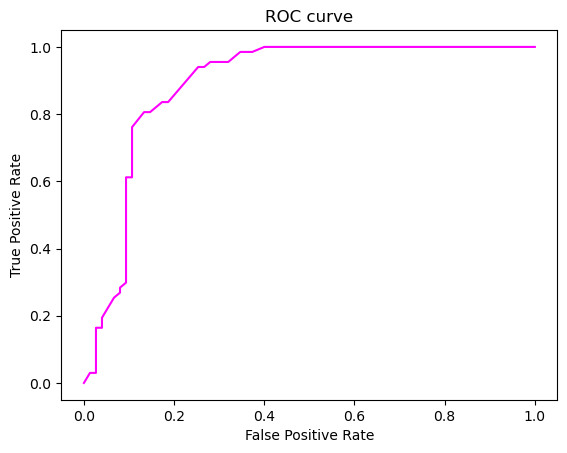

In [209]:
plt.figure()
lw = 2
plt.plot(fpr6, tpr6, color='magenta')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()

In [210]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob = best_RF.predict_proba(train_X)[:, 1]

train_auc = roc_auc_score(train_y, train_y_prob)

In [211]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.stats import percentileofscore

# Calculate original AUC
fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
original_auc = auc(fpr, tpr)
print("Original AUC: {:.3f}".format(original_auc))

# Bootstrapping parameters
n_bootstraps = 1000  # You can adjust this number based on your needs
auc_scores = []

# Bootstrapping process
np.random.seed(321)  # Set random seed for reproducibility
for _ in range(n_bootstraps):
    # Randomly sample training set samples with replacement
    bootstrap_indices = np.random.randint(0, len(train_y), size=len(train_y))
    bootstrap_y = train_y[bootstrap_indices]
    bootstrap_y_score = train_y_prob[bootstrap_indices]
    
    # Calculate AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)
    auc_scores.append(auc_bootstrap)

# Calculate 95% confidence interval
auc_scores = np.array(auc_scores)
auc_scores_sorted = np.sort(auc_scores)
n = len(auc_scores)
lower_idx = int(np.round(n * 0.025))  # Calculate lower bound index
upper_idx = int(np.round(n * 0.975))  # Calculate upper bound index
auc_lower = auc_scores_sorted[lower_idx]
auc_upper = auc_scores_sorted[upper_idx]

print("Training set 95% CI for AUC: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.917
Training set 95% CI for AUC: (0.889, 0.944)


In [212]:
#Calculate metrics for training and testing sets.
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,RF_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y, RF_y_pred)


print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.3f}")
print(f"Specificity: {specificity_train:.3f}")
print(f"PPV (Precision): {ppv_train:.3f}")
print(f"NPV: {npv_train:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.3f}")
print(f"MCC: {mcc_train:.3f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.3f}")
print(f"Specificity: {specificity_test:.3f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.3f}")
print(f"MCC: {mcc_test:.3f}")

Train Set Metrics:
Sensitivity: 0.741
Specificity: 0.887
PPV (Precision): 0.838
NPV: 0.813
Predictive Accuracy: 0.823
MCC: 0.640

Test Set Metrics:
Sensitivity: 0.642
Specificity: 0.893
PPV (Precision): 0.843
NPV: 0.736
Predictive Accuracy: 0.775
MCC: 0.557


Train AUC： 0.9174895764757515


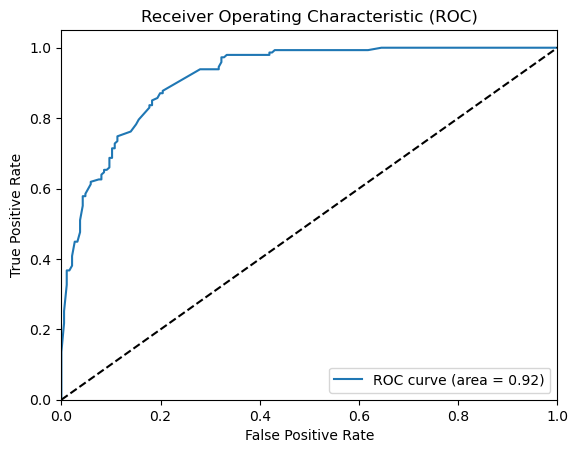

In [213]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Train AUC：", train_auc)


fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [214]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, RF_y_pred, num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(RF_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,RF_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on P-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")

Chi-squared: 10.604264495495503
P-value: 0.3038123139754968
Degrees of freedom: 8
Model calibration is good


In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_params = {
    'n_estimators': 37,
    'random_state': 321,
    'max_depth': 4,
    'min_samples_leaf':15,
    'min_samples_split':80,
}

best_RF = RandomForestClassifier(**rf_params)

best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.8169014084507042


In [216]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, RF_y_pred, num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(RF_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,RF_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on P-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")

Chi-squared: 14.624985868570933
P-value: 0.10176554933608467
Degrees of freedom: 8
Model calibration is good


In [217]:
clf_1_list = [
    (best_RF, "best_RF")
]

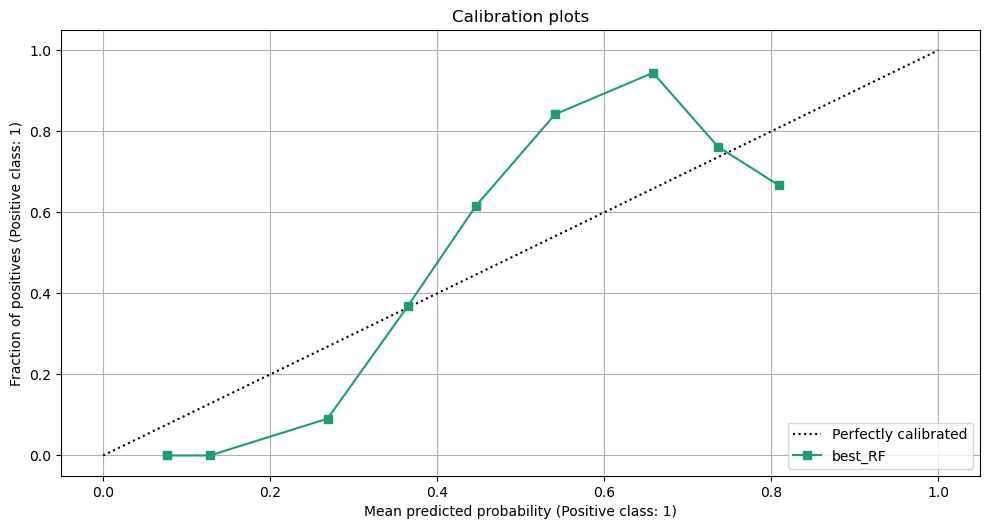

In [218]:
# Set random seed for reproducibility
np.random.seed(999)
random.seed(999)

# Create canvas and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two classifier lists
combined_clf_list =list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,   # Use classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Use colors cyclically
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")   # Save as PDF
plt.show()  # Display the plot


In [219]:
y_pred = RF_y_pred

Model: best_RF, Trained model: RandomForestClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=80,
                       n_estimators=37, random_state=321)


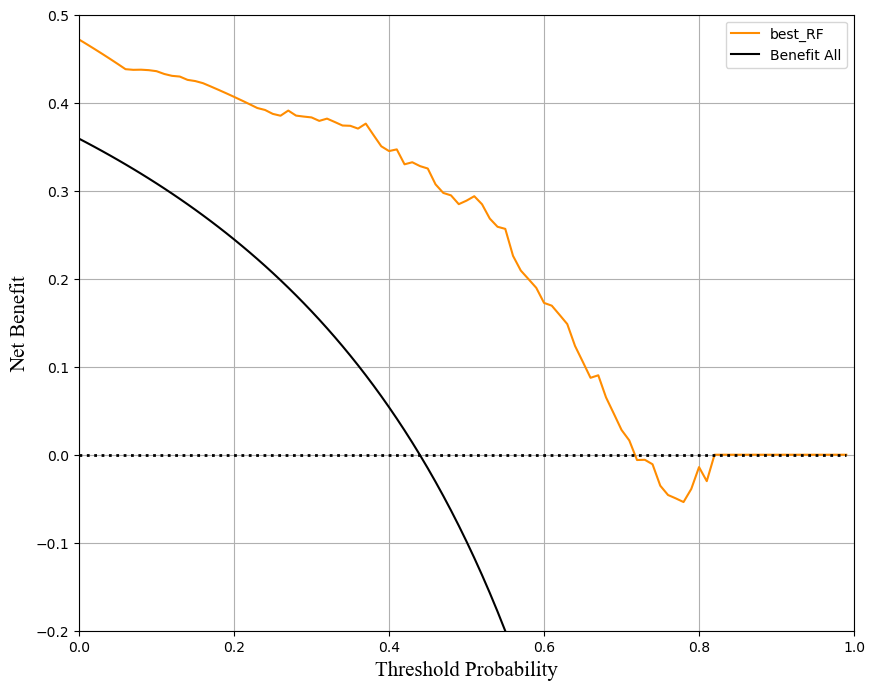

In [220]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(42)
random.seed(42)
 
models = [
    ("best_RF", best_RF)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["darkorange", "navy", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

In [221]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_params = {
    'n_estimators': 210,
    'random_state':9999,
    'max_depth':3,
    'min_samples_leaf':34,
    'min_samples_split':70,
}



best_RF = RandomForestClassifier(**rf_params)


best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.795774647887324


In [223]:
accuracy = accuracy_score(test_y,  RF_y_pred)
RF_y_score = best_RF.predict_proba(test_X)[:, 1]
fprrf,tprrf,threshold = roc_curve(test_y,RF_y_score)
auc(fprrf,tprrf)

0.8803980099502487

In [224]:
import numpy as np  
from sklearn import metrics  
from sklearn.metrics import roc_curve, auc  
  
# Calculate the ROC curve and AUC for the original data
fprrf, tprrf, thresholds = roc_curve(test_y, RF_y_score)  
original_auc = auc(fprrf, tprrf)  
print("Original AUC: {:.3f}".format(original_auc))
  
# Bootstrapping parameters  
n_bootstraps = 1000  # Adjust this number as needed  
auc_scores = []  
  
# Bootstrapping process  
np.random.seed(321)  # Set the random seed for reproducibility  
for _ in range(n_bootstraps):  
    # Randomly sample with replacement from the test set
    bootstrap_indices = np.random.randint(0, len(test_y), size=len(test_y))  
    bootstrap_y = test_y[bootstrap_indices]  
    bootstrap_y_score = RF_y_score[bootstrap_indices]  
      
    # Calculate the AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)  
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)  
    auc_scores.append(auc_bootstrap)  
  
# Calculate the 95% confidence interval
auc_scores = np.array(auc_scores)  
auc_scores_sorted = np.sort(auc_scores)  
n = len(auc_scores)  
lower_idx = int(np.round(n * 0.025))  # Calculate the lower bound index  
upper_idx = int(np.round(n * 0.975))  # Calculate the upper bound index  
auc_lower = auc_scores_sorted[lower_idx]  
auc_upper = auc_scores_sorted[upper_idx]  
  
print("Test set 95% CI for AUC: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.880
Test set 95% CI for AUC: (0.824, 0.941)


In [225]:
from sklearn.metrics import roc_auc_score, roc_curve
RF_train_y_pred = best_RF.predict(train_X)
train_y_prob = best_RF.predict_proba(train_X)[:, 1]

# AUC
train_auc = roc_auc_score(train_y, train_y_prob)
# Train AUC  
fprRF, tprRF, thresholds = roc_curve(train_y,train_y_prob)  
original_auc = auc(fprRF, tprRF)  
print("Original AUC: {:.3f}".format(original_auc))

Original AUC: 0.916


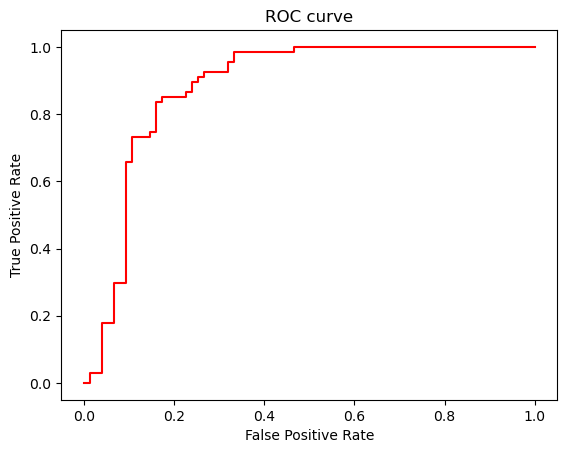

In [226]:
plt.figure()
#plt.plot(fpr, tpr, color='b')  
plt.plot(fprrf,tprrf, color='red')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()    

In [227]:
import numpy as np  
from sklearn.metrics import roc_curve, auc  
  
# Calculate the original AUC
fprRF, tprRF, thresholds = roc_curve(train_y, train_y_prob)  
original_auc = auc(fprRF, tprRF)  
print("Original AUC: {:.3f}".format(original_auc))
  
# Bootstrapping parameters  
n_bootstraps = 1000  # Adjust this number as needed  
auc_scores = []  
  
# Bootstrapping process  
np.random.seed(321)  # Set the random seed for reproducibility  
for _ in range(n_bootstraps):  
    # Randomly sample with replacement from the training set
    bootstrap_indices = np.random.randint(0, len(train_y), size=len(train_y))  
    bootstrap_y = train_y[bootstrap_indices]  
    bootstrap_y_score = train_y_prob[bootstrap_indices]  
      
    # Calculate the AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)  
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)  
    auc_scores.append(auc_bootstrap)  
  
# Calculate the 95% confidence interval
auc_scores = np.array(auc_scores)  
auc_scores_sorted = np.sort(auc_scores)  
n = len(auc_scores)  
lower_idx = int(np.round(n * 0.025))  # Calculate the lower bound index  
upper_idx = int(np.round(n * 0.975))  # Calculate the upper bound index  
auc_lower = auc_scores_sorted[lower_idx]  
auc_upper = auc_scores_sorted[upper_idx]  
  
print("Training set 95% CI for AUC: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.916
Training set 95% CI for AUC: (0.884, 0.943)


In [228]:
# Training、testing set metrics
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,RF_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y, RF_y_pred)

# print
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.3f}")
print(f"Specificity: {specificity_train:.3f}")
print(f"PPV (Precision): {ppv_train:.3f}")
print(f"NPV: {npv_train:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.3f}")
print(f"MCC: {mcc_train:.3f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.3f}")
print(f"Specificity: {specificity_test:.3f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.3f}")
print(f"MCC: {mcc_test:.3f}")

Train Set Metrics:
Sensitivity: 0.823
Specificity: 0.844
PPV (Precision): 0.807
NPV: 0.858
Predictive Accuracy: 0.835
MCC: 0.666

Test Set Metrics:
Sensitivity: 0.746
Specificity: 0.840
PPV (Precision): 0.806
NPV: 0.787
Predictive Accuracy: 0.796
MCC: 0.590


Train AUC： 0.915697461780411


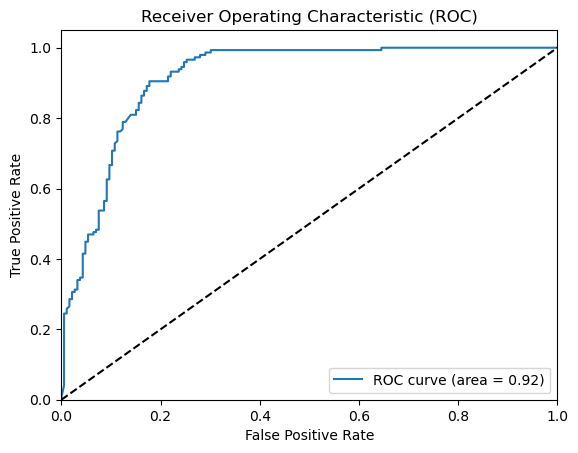

In [229]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Train AUC：", train_auc)


fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [230]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, RF_y_pred, num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(RF_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,RF_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on P-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")

Chi-squared: 12.431163258692122
P-value: 0.1900789131095703
Degrees of freedom: 8
Model calibration is good


In [231]:
clf_1_list = [
    (best_RF, "best_RF"),
]

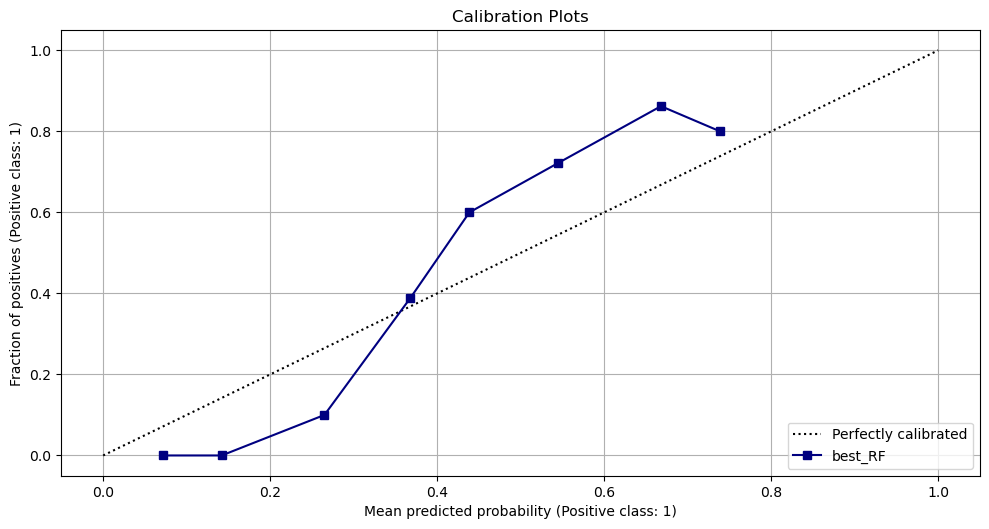

In [232]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(321)
random.seed(321)

# Create a figure and a grid of subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create a subplot for the calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration Plots")

# Assume clf_list and clf_1_list are lists of (classifier, name) tuples
combined_clf_list = list(clf_1_list)  # Merge the classifier lists

# Define a list of colors
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the classifier
    color = colors[i % len(colors)]  # Cycle through the colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF (optional)
plt.show()  # Display the plot


In [233]:
RF_y_pred =  best_RF.predict(test_X)


Model: best_RF, Trained model: RandomForestClassifier(max_depth=3, min_samples_leaf=34, min_samples_split=70,
                       n_estimators=210, random_state=9999)


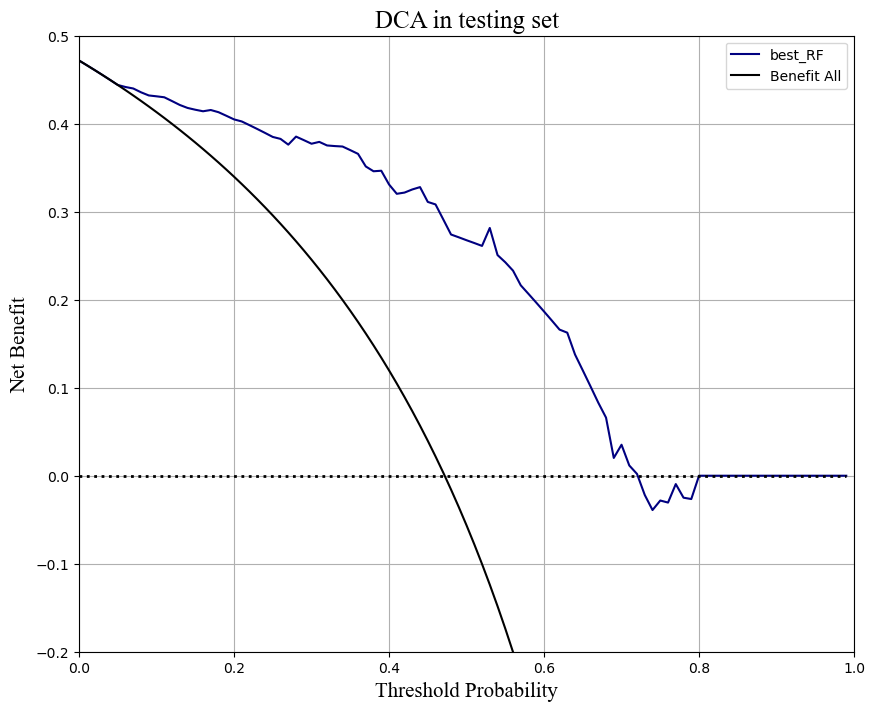

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
models = [
    ("best_RF", best_RF),
] 


def net_benefit_model(test_y,y_prob,thresh_group):
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        n=len(test_y)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model


def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,test_y).ravel()
    total = tp + tn
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.title('DCA in testing set', fontdict={'family': 'Times New Roman', 'fontsize': 18, 'stretch': 'expanded'})
plt.grid('major')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# That's all for Random Forest. Thanks for watching.